In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pro=pd.read_csv(r"C:\Users\DELL\Desktop\project\Customer Flight Activity.csv")

In [3]:
pro

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...
392931,999986,2018,4,0,0,0.0,0,0
392932,999986,2018,5,0,0,0.0,0,0
392933,999986,2018,6,0,0,0.0,0,0
392934,999986,2018,9,0,0,0.0,0,0


In [104]:
pro.index

RangeIndex(start=0, stop=392936, step=1)

In [6]:
pro.shape

(392936, 8)

In [7]:
pro.size

3143488

In [12]:
pro.nunique()

Loyalty Number                 16737
Year                               2
Month                             12
Total Flights                     17
Distance                        9456
Points Accumulated             10284
Points Redeemed                  587
Dollar Cost Points Redeemed      108
dtype: int64

In [13]:
pro.nunique(axis=0,dropna=False)

Loyalty Number                 16737
Year                               2
Month                             12
Total Flights                     17
Distance                        9456
Points Accumulated             10284
Points Redeemed                  587
Dollar Cost Points Redeemed      108
dtype: int64

In [105]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [106]:
pro.columns.to_list()

['Loyalty Number',
 'Year',
 'Month',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed']

In [107]:
pro.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [108]:
pd.isnull(pro).sum()

Loyalty Number                 0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [109]:
pro.describe()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000
mean,550527.519034,2017.513661,6.513661,1.294888,1941.440201,2027.172345,31.304263,5.635661
std,258604.580187,0.499814,3.445428,1.962675,3239.975889,3872.139841,126.653775,22.801167
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327688.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551833.000000,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,772194.000000,2018.000000,10.000000,2.000000,3018.000000,3039.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,28.000000,67284.000000,100926.000000,876.000000,158.000000


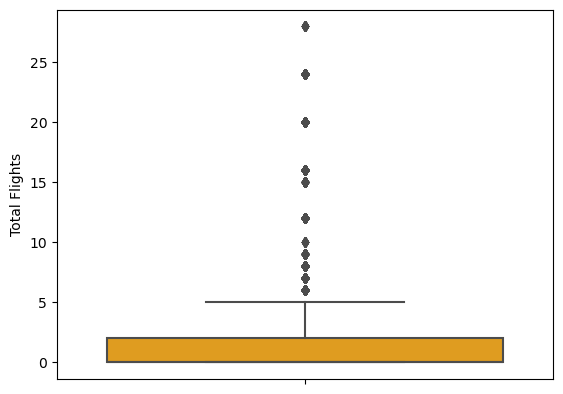

In [110]:
sns.boxplot(y=pro["Total Flights"],color="orange")
plt.show()

In [20]:
pro.groupby(["Year"],as_index=False)["Total Flights"].sum()

,Year,Total Flights
0,2017,223262
1,2018,285546


<Axes: xlabel='Year', ylabel='Total Flights'>

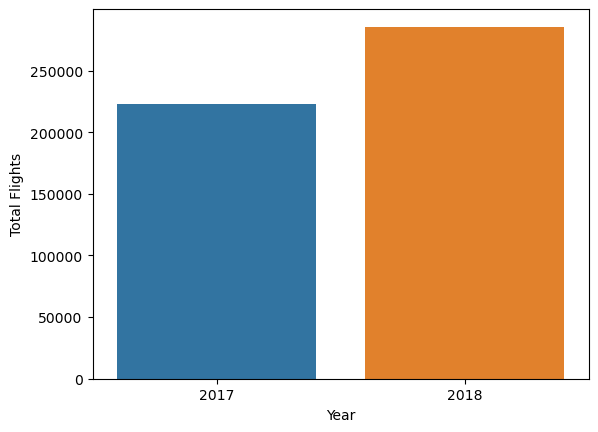

In [112]:
Total=pro.groupby(["Year"],as_index=False)["Total Flights"].sum().sort_values(by="Total Flights",ascending=False)
sns.barplot(x = "Year",y="Total Flights",data = Total)

In [115]:
loyalty=pro.groupby(["Loyalty Number","Year"],as_index=False)["Total Flights"].sum().sort_values(by="Total Flights",ascending=False)

In [132]:
final_result = loyalty[loyalty["Total Flights"] > 50]
final_result.reset_index(drop=True)

,Loyalty Number,Year,Total Flights
0,813455,2018,104
1,385092,2018,102
2,983416,2018,100
3,732304,2018,98
4,110065,2018,97
...,...,...,...
413,903359,2018,51
414,342483,2018,51
415,760158,2018,51
416,142621,2018,51


In [131]:
Top=final_result.head(10)
Top

,Loyalty Number,Year,Total Flights
25819,813455,2018,104
10225,385092,2018,102
31945,983416,2018,100
22872,732304,2018,98
372,110065,2018,97
19013,625320,2018,96
16435,556492,2018,95
3395,195994,2018,93
1190,133324,2018,93
14437,500248,2018,91


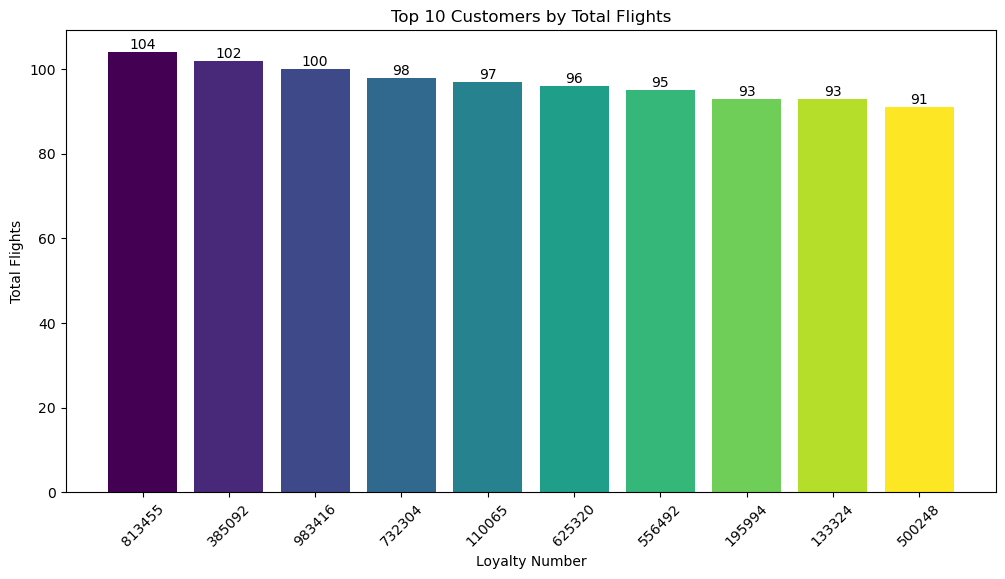

In [119]:
plt.figure(figsize=(12, 6))
bars = plt.bar(Top['Loyalty Number'].astype(str), Top['Total Flights'], color=colors)
plt.xlabel('Loyalty Number')
plt.ylabel('Total Flights')
plt.title('Top 10 Customers by Total Flights')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.show()

In [128]:
points=pro.groupby(["Loyalty Number"],as_index=False)["Points Accumulated"].sum().sort_values(by="Points Accumulated",ascending=False)

In [137]:
top_points=points.head(10)
top_points.reset_index(drop=True)

,Loyalty Number,Points Accumulated
0,689839,268287.0
1,893866,252960.0
2,500248,238120.5
3,133324,233815.5
4,471015,232176.0
5,385092,231432.0
6,201273,225346.5
7,208961,225282.0
8,556492,224673.0
9,712114,220048.5


In [4]:
pro1=pd.read_csv(r"C:\Users\DELL\Desktop\project\Customer Loyalty History.csv")
pro1

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [122]:
pro1.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [123]:
pro1.isnull().sum().sort_values(ascending=False)

Cancellation Year     14670
Cancellation Month    14670
Salary                 4238
Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
dtype: int64

In [124]:
round(pro1.isnull().sum()/len(pro1)*100,2).sort_values(ascending=False)

Cancellation Year     87.65
Cancellation Month    87.65
Salary                25.32
Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
dtype: float64

In [6]:
df_loyalty = pd.read_csv(r"C:\Users\DELL\Desktop\project\Customer Loyalty History.csv")
df_activity = pd.read_csv(r"C:\Users\DELL\Desktop\project\Customer Flight Activity.csv")

df_merged = pd.merge(df_loyalty, df_activity, on="Loyalty Number", how="outer")

df_merged.head()


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2018,7,5,11355,11355.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2017,5,4,4908,4908.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2017,6,4,6948,6948.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2017,8,4,5516,5516.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2018,4,4,4376,4376.0,0,0


In [5]:
df_merged.head(12)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2018,7,5,11355,11355.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2017,5,4,4908,4908.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2017,6,4,6948,6948.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2017,8,4,5516,5516.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2018,4,4,4376,4376.0,0,0
5,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2018,9,4,5048,5048.0,0,0
6,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2018,10,2,4242,4242.0,465,84
7,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2017,7,2,2302,2302.0,0,0
8,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2017,11,2,3490,3490.0,322,58
9,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,0,0,2018,5,2,1364,1364.0,0,0


In [18]:
df_merged.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,392936.000000,293371.000000,392936.000000,392936.000000,392936.000000,48556.000000,48556.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000
mean,550527.519034,79518.020561,7989.614185,2015.163813,6.784728,2016.452920,6.852418,2017.513661,6.513661,1.294888,1941.440201,2027.172345,31.304263,5.635661
std,258604.580187,34219.141062,6840.750456,1.947571,3.387459,1.379785,3.424392,0.499814,3.445428,1.962675,3239.975889,3872.139841,126.653775,22.801167
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327688.000000,59429.000000,3985.320000,2013.000000,4.000000,2016.000000,4.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551833.000000,73695.000000,5771.610000,2015.000000,7.000000,2017.000000,7.000000,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,772194.000000,88792.000000,8940.580000,2017.000000,10.000000,2018.000000,10.000000,2018.000000,10.000000,2.000000,3018.000000,3039.000000,0.000000,0.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000,2018.000000,12.000000,28.000000,67284.000000,100926.000000,876.000000,158.000000


In [23]:
df_merged.isnull().sum()

Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [21]:
df_merged.columns.tolist()

['Loyalty Number',
 'Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Salary',
 'Marital Status',
 'Loyalty Card',
 'CLV',
 'Enrollment Type',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month',
 'Year',
 'Month',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed']

In [9]:
df_merged['salary'].nunique(dropna=False)

5891

In [13]:
df_merged['Salary'] = df_merged['Salary'].fillna('NULL')

In [15]:
df_merged['Salary'].isnull().sum()

0

In [11]:
df_merged['Cancellation Year'] = df_merged['Cancellation Year'].notna().astype(int)

In [12]:
df_merged['Cancellation Month'] = df_merged['Cancellation Month'].notna().astype(int)

In [9]:
df_merged["City"].value_counts()

City
Toronto           78834
Vancouver         60557
Montreal          48100
Winnipeg          15711
Whistler          13663
Halifax           12329
Ottawa            11896
Edmonton          11509
Trenton           11383
Quebec City       11201
Dawson Creek      10412
Fredericton       10058
Regina             9624
Kingston           9447
Tremblant          9236
Victoria           9088
Hull               8363
West Vancouver     7547
St. John's         6104
Thunder Bay        6082
Sudbury            5286
Moncton            4945
Calgary            4506
Banff              4244
London             4094
Peace River        2634
Whitehorse         2571
Kelowna            1941
Charlottetown      1571
Name: count, dtype: int64

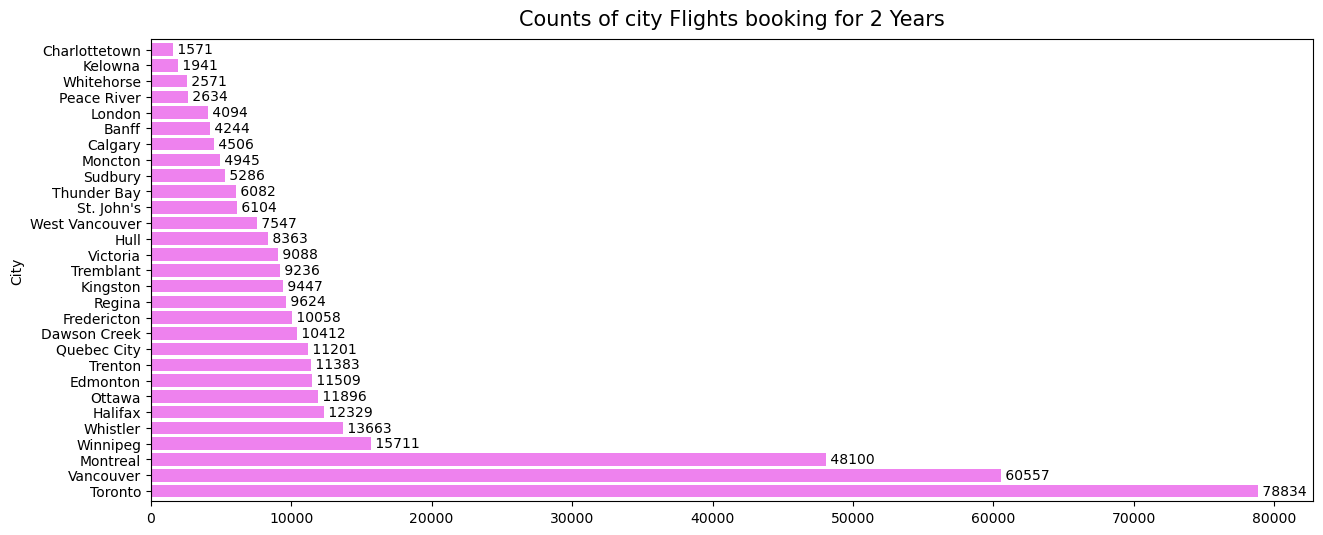

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

counts_of_city_flights=df_merged["City"].value_counts()


counts_of_city_flights.plot.barh(width=0.8,color='violet')

plt.title("Counts of city Flights booking for 2 Years",fontdict={'fontsize':15},pad=10)

for index, value in enumerate(counts_of_city_flights):
    
    plt.text(value, index, f' {value}', va='center', ha='left', color='black', fontsize=10)
plt.show()

In [10]:
df_merged["Education"].value_counts()

Education
Bachelor                245484
College                  99565
High School or Below     18358
Doctor                   17440
Master                   12089
Name: count, dtype: int64

CANCELLATION PROBABILT ON THE BASIS OF EDUCATION BACKGROUND

In [10]:
df_merged['Cancellation_Status'] = df_merged['Cancellation Year'].apply(lambda x:0 if pd.notnull(x) else 1)
df_merged["Cancellation_Status"].value_counts()

Cancellation_Status
1    344380
0     48556
Name: count, dtype: int64

In [11]:
cancellations_by_person = df_merged[df_merged['Cancellation_Status'] == 1].groupby(['Education'], as_index=False)['Cancellation_Status'].sum()

# Now you can filter to show who canceled the flights for specific education levels
cancellation1 = cancellations_by_person[cancellations_by_person["Cancellation_Status"] > 1000].reset_index(drop=True)

# Display the result
cancellation1


,Education,Cancellation_Status
0,Bachelor,215183
1,College,87309
2,Doctor,15164
3,High School or Below,16154
4,Master,10570


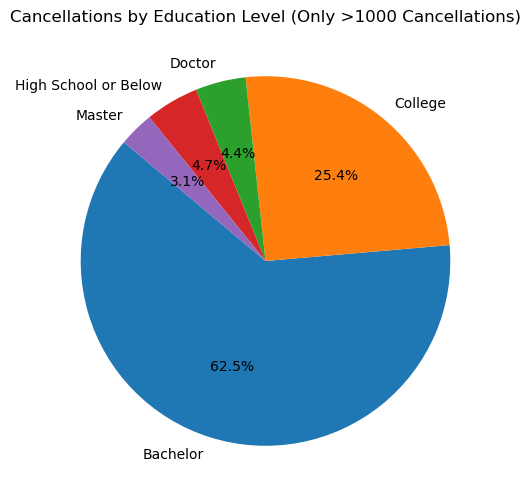

In [39]:
plt.figure(figsize=(8, 6))
plt.pie(cancellation1["Cancellation_Status"], labels=cancellation1["Education"], autopct='%1.1f%%', startangle=140)
plt.title('Cancellations by Education Level (Only >1000 Cancellations)')
plt.show()

Factors contributing to higher customer lifetime value (CLV) among loyalty members

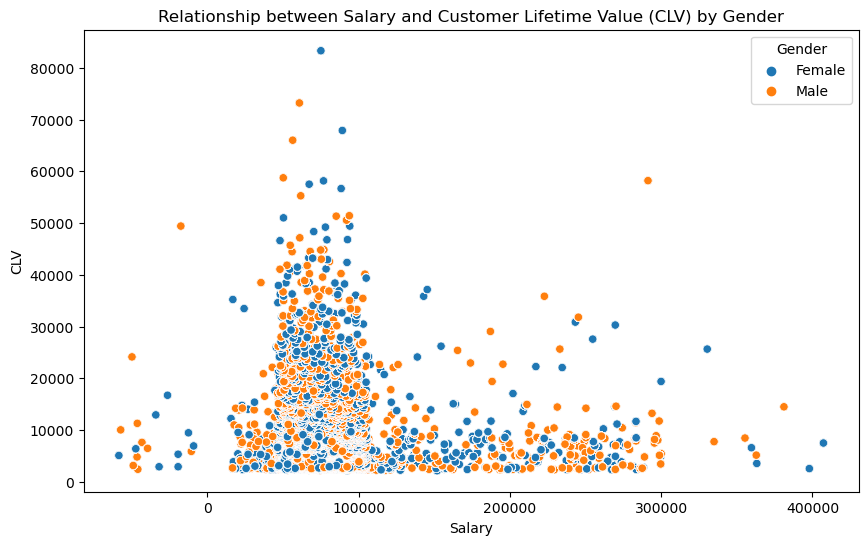

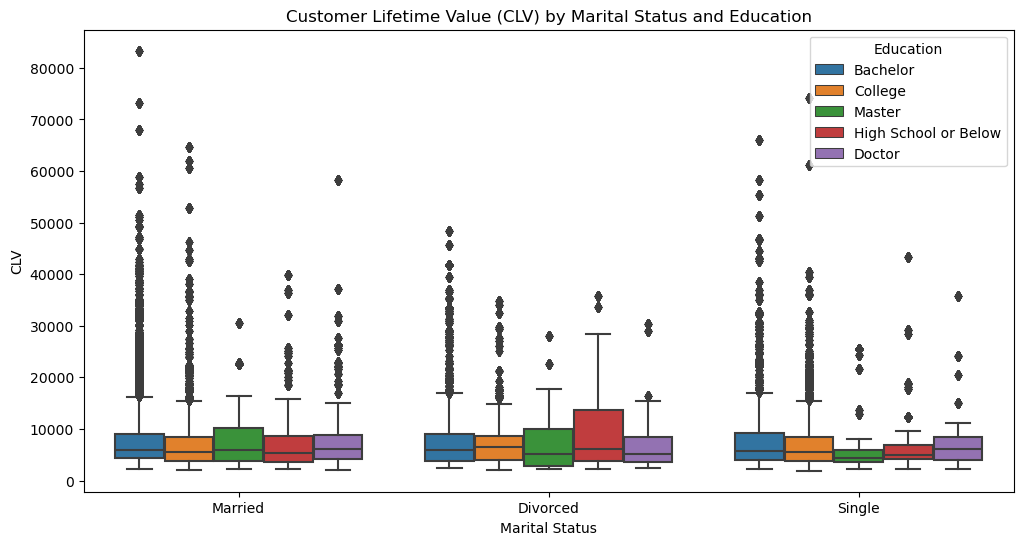

In [12]:
columns_of_interest = [
    "CLV", "Total Flights", "Distance", "Points Accumulated", "Points Redeemed", 
    "Gender", "Education", "Salary", "Marital Status", "Loyalty Card", 
    "Enrollment Type", "Country", "Province"
]
df_clv_analysis = df_merged[columns_of_interest]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clv_analysis, x="Salary", y="CLV", hue="Gender", edgecolor="w")
plt.title("Relationship between Salary and Customer Lifetime Value (CLV) by Gender")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clv_analysis, x="Marital Status", y="CLV", hue="Education")
plt.title("Customer Lifetime Value (CLV) by Marital Status and Education")
plt.show()


Customer Lifetime Value (CLV) is a critical metric in business that measures the total value
a customer is expected to bring to a company over the course of their relationship.
It helps businesses understand how much revenue they can reasonably expect from a customer
and informs decisions about customer acquisition, retention, and marketing efforts.

How does flight frequency vary by customer demographics such as gender, education, and income

In [17]:
flight_salary = df_merged.groupby("Salary")["Total Flights"].mean().reset_index()
flight_gender = df_merged.groupby("Gender")["Total Flights"].mean().reset_index()
flight_education = df_merged.groupby("Education")["Total Flights"].mean().reset_index()

In [11]:
flight_gender

,Gender,Total Flights
0,Female,1.288450
1,Male,1.301373


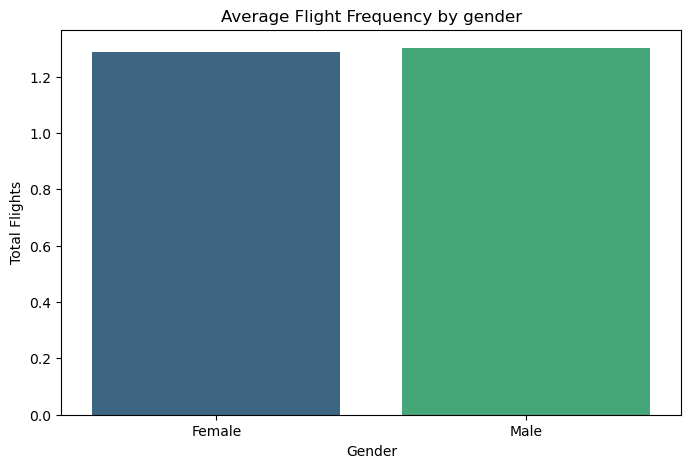

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=flight_gender,x="Gender",y="Total Flights",palette="viridis")
plt.xlabel("Gender")
plt.ylabel("Total Flights")
plt.title("Average Flight Frequency by gender")
plt.show()


Are there specific provinces or cities with a higher number of active loyalty members

In [27]:
province_counts = df_clv_analysis["Province"].value_counts()

province_counts


Province
Ontario                 127022
British Columbia        103208
Quebec                   76900
Alberta                  22893
Manitoba                 15711
New Brunswick            15003
Nova Scotia              12329
Saskatchewan              9624
Newfoundland              6104
Yukon                     2571
Prince Edward Island      1571
Name: count, dtype: int64

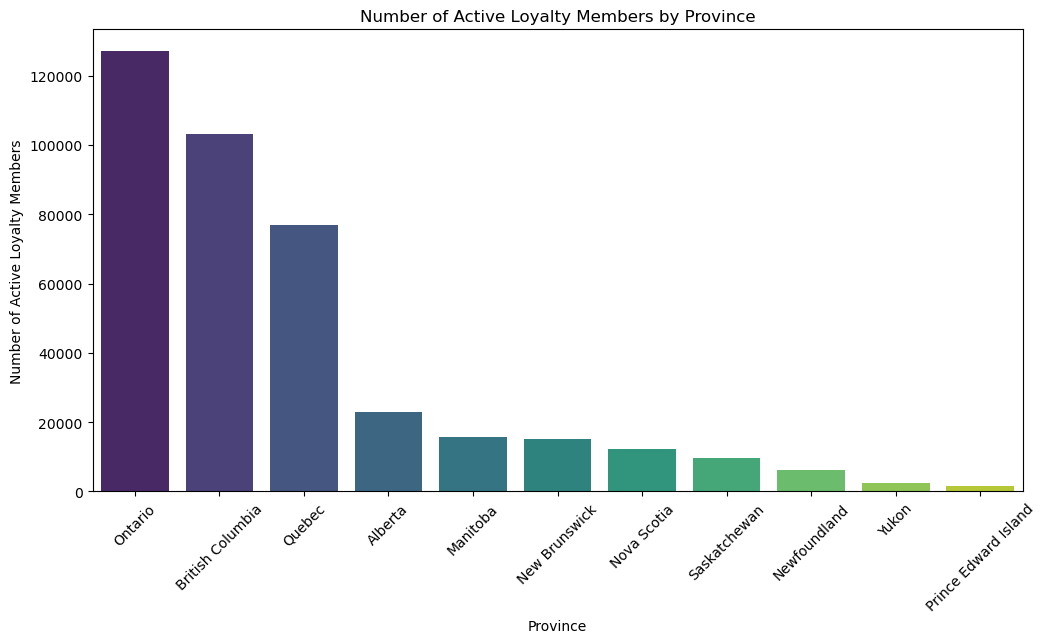

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=province_counts.index, y=province_counts.values, palette="viridis")
plt.title("Number of Active Loyalty Members by Province")
plt.xlabel("Province")
plt.ylabel("Number of Active Loyalty Members")
plt.xticks(rotation=45)
plt.show()


How effective are loyalty promotions (e.g., enrollment type like “2018 Promotion”) in retaining frequent flyers?

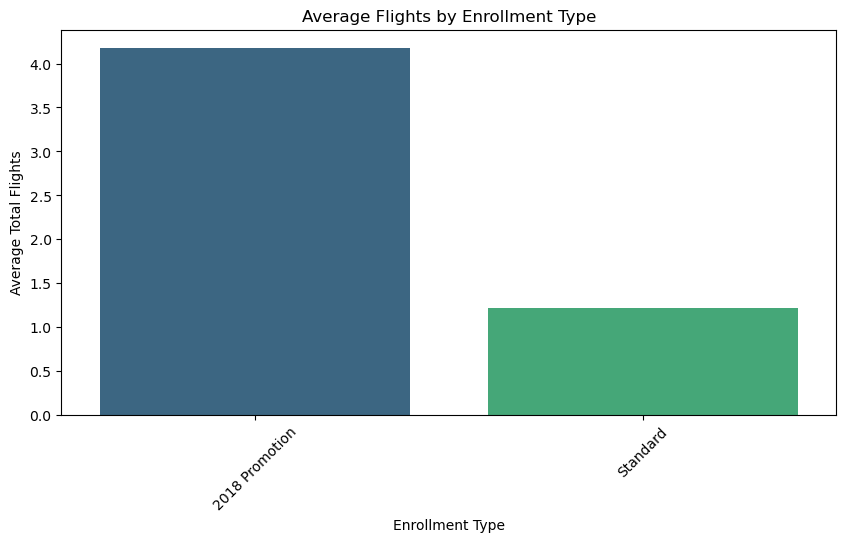

In [27]:
promotion_analysis = df_merged.groupby("Enrollment Type").agg(
    Retention_Rate=("Cancellation_Status", lambda x: 1 - x.mean()),  
    Avg_Flights=("Total Flights", "mean")
).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=promotion_analysis, x="Enrollment Type", y="Avg_Flights", palette="viridis")
plt.title("Average Flights by Enrollment Type")
plt.ylabel("Average Total Flights")
plt.xlabel("Enrollment Type")
plt.xticks(rotation=45)
plt.show()

In [17]:
df_merged.columns.tolist()

['Loyalty Number',
 'Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Salary',
 'Marital Status',
 'Loyalty Card',
 'CLV',
 'Enrollment Type',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month',
 'Year',
 'Month',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed',
 'Cancellation_Status']

Do higher-income customers redeem points more often or travel longer distances?

In [31]:
df_merged["Income Bracket"] = pd.cut(df_merged["Salary"], 
                                     bins=[0, 50000, 100000, 150000, 200000,250000], 
                                     labels=["Low", "Lower-Middle", "Middle", "Upper-Middle", "High"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7880\2663827087.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_analysis = df_merged.groupby("Income Bracket").agg(
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


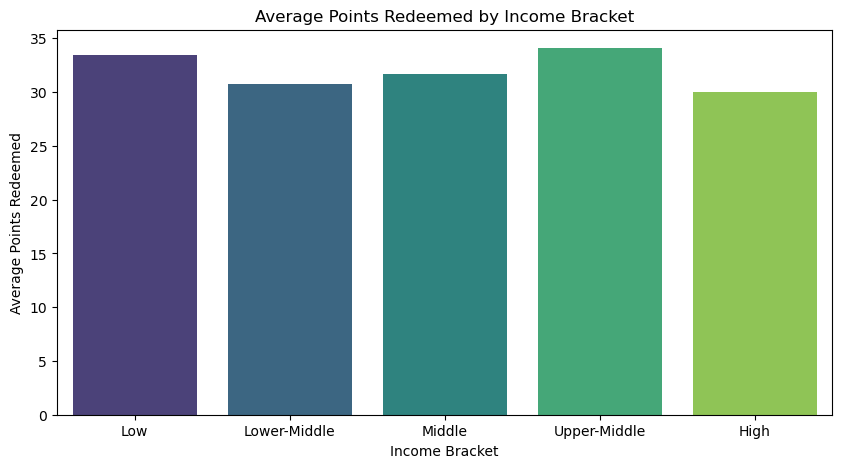

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


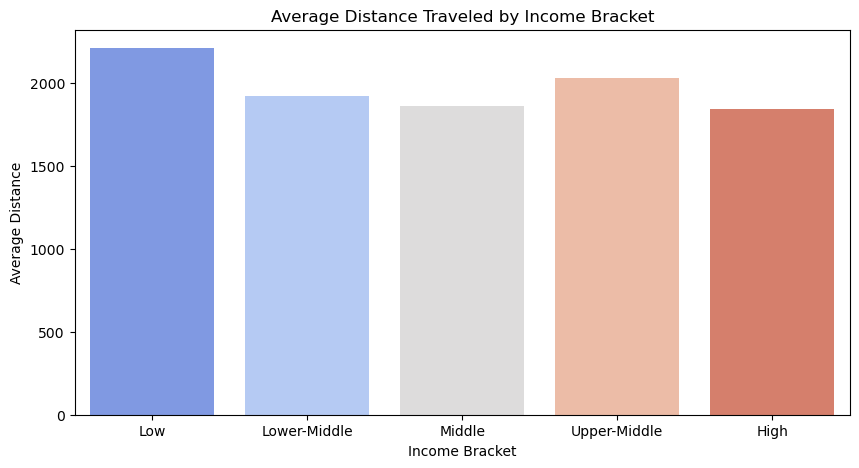

In [38]:
income_analysis = df_merged.groupby("Income Bracket").agg(
    Avg_Points_Redeemed=("Points Redeemed", "mean"),
    Avg_Distance=("Distance", "mean")
).reset_index()

# Bar plot: Average points redeemed by income bracket
plt.figure(figsize=(10, 5))
sns.barplot(data=income_analysis, x="Income Bracket", y="Avg_Points_Redeemed", palette="viridis")
plt.title("Average Points Redeemed by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Points Redeemed")
plt.show()

# Bar plot: Average distance traveled by income bracket
plt.figure(figsize=(10, 5))
sns.barplot(data=income_analysis, x="Income Bracket", y="Avg_Distance", palette="coolwarm")
plt.title("Average Distance Traveled by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Distance")
plt.show()



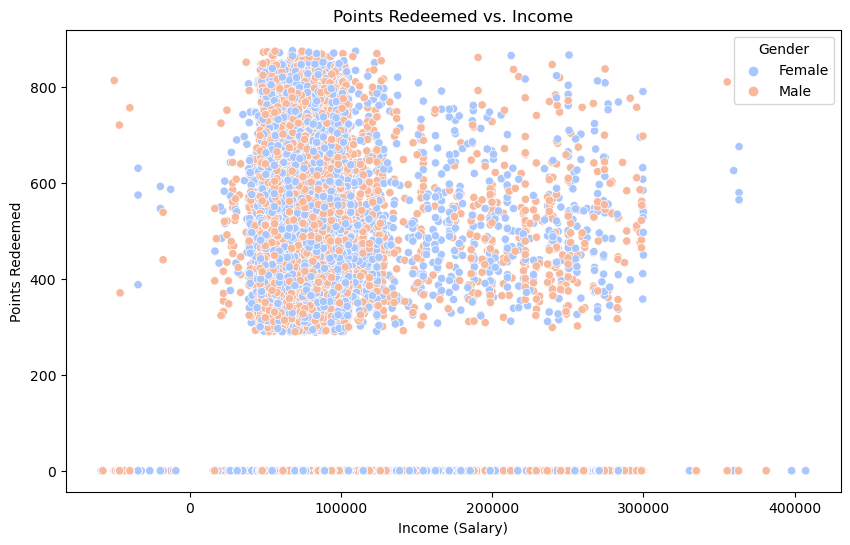

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x="Salary", y="Points Redeemed", hue="Gender", palette="coolwarm")
plt.title("Points Redeemed vs. Income")
plt.xlabel("Income (Salary)")
plt.ylabel("Points Redeemed")
plt.show()

Is there a seasonal trend in flight activity or loyalty program cancellations across different regions?

In [44]:
df_merged["Season"] = pd.cut(
    df_merged["Month"],
    bins=[0, 3, 6, 9, 12],  # Bins for seasons
    labels=["Winter", "Spring", "Summer", "Fall"])

In [55]:
seasonal_trends = df_merged.groupby([ "Season"]).agg(
    Avg_Flights=("Total Flights", "mean"),
    Cancellation_Rate=("Cancellation_Status", "mean")
).reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7880\3186707499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trends = df_merged.groupby([ "Season"]).agg(


C:\Users\DELL\AppData\Local\Temp\ipykernel_7880\4137861734.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


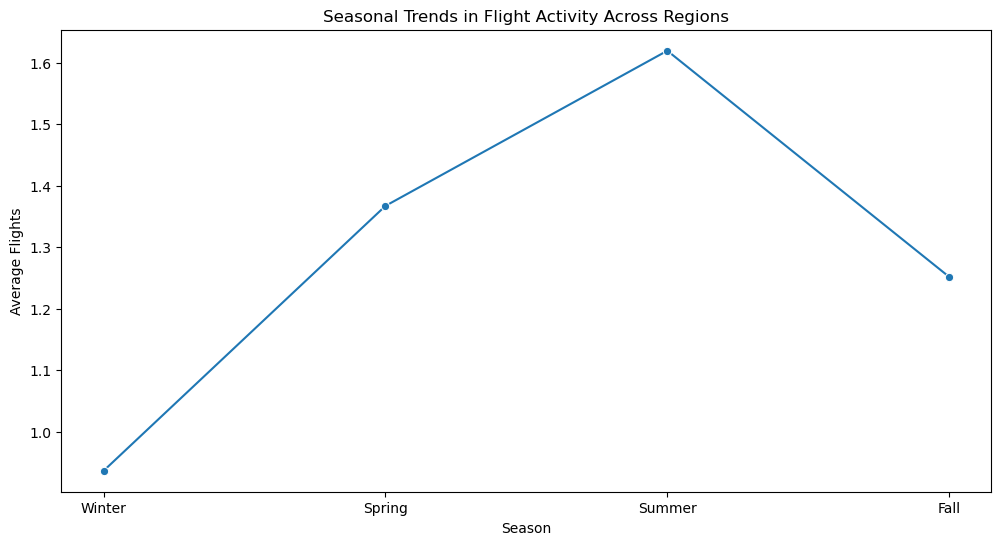

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=seasonal_trends,
    x="Season",
    y="Avg_Flights",
    marker="o",
    palette="viridis"
)
plt.title("Seasonal Trends in Flight Activity Across Regions")
plt.ylabel("Average Flights")
plt.xlabel("Season")
plt.show()